In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [21]:
# Bildpfad wird definiert
image_path = "../output_vids/cropped_img.png"

# Bild wird geladen mit OpenCV
image = cv2.imread(image_path)

# OpenCV liest Bilder im BGR-Format, Matplotlib in RGB. Es muss umgewandelt werden
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Falls das Bild nicht geladen werden konnte
if image is None:
    print("Bild konnte nicht geladen werden.")

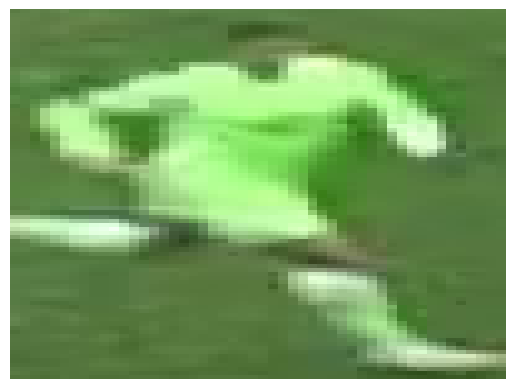

In [22]:
plt.imshow(image, aspect='auto')
plt.axis('off')  # Entfernt Achsen für eine klarere Darstellung
plt.show()

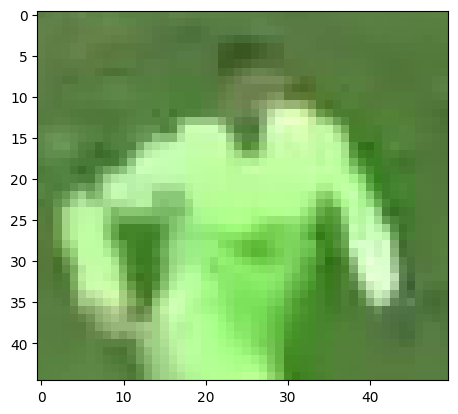

In [23]:
# Der obere Teil des Bildes (erste Hälfte der Höhe) wird extrahiert
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

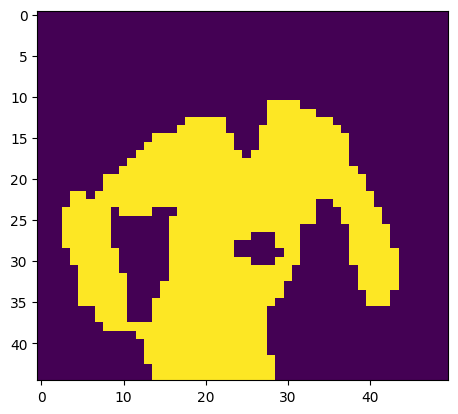

In [27]:
# Das Bild wird in eine 2D-Matrix umgewandelt
# Jeder Pixel hat drei Farbkanäle (RGB), daher wird das Bild zu einem Array von Pixeln (Zeilen mit je 3 Werten) umgeformt
image_2d = top_half_image.reshape(-1, 3)

# K-Means Clustering wird durchgeführt, um das Bild in zwei Cluster zu unterteilen
# Es wird davon ausgegangen, dass es zwei Hauptcluster gibt (z.B. Spieler und Hintergrund)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

# Die Cluster-Labels werden von K-Means für jedes Pixel ermittelt
labels = kmeans.labels_

# Die Labels werden in die ursprüngliche Bildform (der oberen Bildhälfte) zurückverwandelt
# Jeder Pixel wird mit seinem zugehörigen Cluster-Label versehen
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])


# Das Bild, in dem die Cluster dargestellt sind, wird angezeigt
plt.imshow(clustered_image)
plt.show()

In [28]:
# Die Cluster-Werte in den vier Ecken des Bildes werden genommen, um den dominanten Hintergrund zu bestimmen
# Die Cluster in den Bildecken werden als Hintergrundcluster angesehen (da sich dort selten Spieler befinden)
corner_clusters = [clustered_image[0, 0], clustered_image[0, 1], clustered_image[-1, 0], clustered_image[-1, 1]]

# Das häufigste Cluster in den Ecken wird als "Nicht-Spieler-Cluster" identifiziert
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [29]:
# Das Spieler-Cluster ist das andere Cluster, da es nur zwei gibt (1 und 0)
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [30]:
# Die Farbwerte des Spieler-Clusters werden aus den Cluster-Zentren ausgegeben
# Die Cluster-Zentren repräsentieren den durchschnittlichen Farbwert jedes Clusters
kmeans.cluster_centers_[player_cluster]

array([171.33821571, 236.20106525, 142.96271638])